In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random


from cities.utils.data_grabber import DataGrabber, list_interventions, list_outcomes
from cities.queries.causal_insight import CausalInsight

In [2]:
interventions = list_interventions()
outcomes = list_outcomes()
shifts = [1, 2, 3]

outcome = "unemployment_rate"
intervention = "spending_commerce"
shift = 2
intervened_value = 0.05
# fips = 1005

data = DataGrabber()
data.get_features_wide(["gdp"])
gdp = data.wide["gdp"]
# values = [round(i * 0.1, 1) for i in range(1, 10)]
fips = random.choice(gdp["GeoFIPS"])
# intervened_value = random.choice(values)

In [3]:
ci = CausalInsight(
    outcome_dataset=outcome,
    intervention_dataset=intervention,
    num_samples=1000,
)

ci.generate_tensed_samples()

In [5]:
ci.get_fips_predictions(intervened_value=intervened_value, fips=fips)
display(ci.predictions)
display(ci.predictions_original)

print(outcome)
print("intervention dataset", intervention)
print("intervened_value", ci.intervened_value)
print("intervened_value_original_scale", ci.intervened_value_original)
print("intervened_value_percentile", ci.intervened_value_percentile)

,year,observed,mean,low,high
2018,2018,0.032859,0.032859,0.032859,0.032859
2019,2019,0.049664,0.046655,0.045516,0.047756
2020,2020,0.055175,0.052493,0.051340,0.053617
2021,2021,0.024888,0.022216,0.020950,0.023466


,year,observed,mean,low,high
2018,2018,4.4,4.400000,4.400000,4.400000
2019,2019,4.4,4.373450,4.363405,4.383162
2020,2020,7.5,7.462908,7.446963,7.478446
2021,2021,4.9,4.872378,4.859298,4.885303


unemployment_rate
intervention dataset spending_commerce
intervened_value 0.05



0.003903708523096942


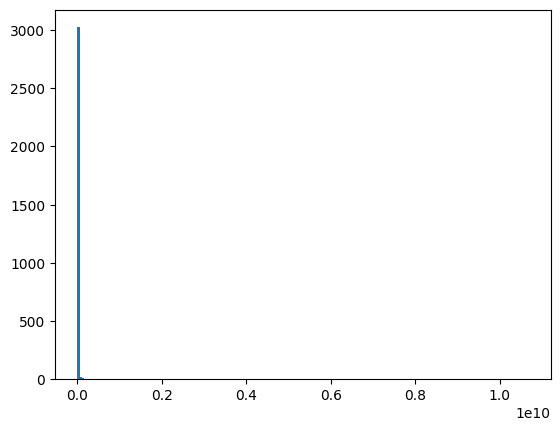

In [5]:
dg = DataGrabber()
dg.get_features_wide([ci.intervention_dataset])
plt.hist(dg.wide[ci.intervention_dataset]["2018"].values, bins=200)

print(np.mean(dg.wide[ci.intervention_dataset]["2018"].values >= 751504624.23))

In [6]:
print(ci.intervened_value)
print(ci.intervened_value_original)
print(ci.intervened_value_percentile)

0.05
109775113.29
99.2


In [7]:
display(ci.predictions_original)

,observed,mean,low,high,year
0,3.0,3.0,3.0,3.0,2018
1,2.8,2.8,2.8,2.8,2019
2,7.6,7.6,7.5,7.6,2020
3,3.1,3.1,3.1,3.1,2021


In [8]:
ci.plot_predictions(scaling="transformed")

In [9]:
ci.plot_predictions(scaling="original")